In [6]:
reset()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  (), please run `%reset?` for details


In [7]:
import pandas as pd
import numpy as np


In [8]:
import pyodbc 
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=esmz08srdb009;'
                      'Database=ITE_PRD;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()
sql="""\

SELECT  a11.[CUSTOMER_ID]
	,case when a112.[Answer_Two] ='' then null else a112.[Answer_Two] end Sales2C
	,ceiling(isnull(case  a112.[Answer_Two] 
			  when '0% - 5%'   then  0.03
			  when '6% - 10%'  then  0.08
			  when '11% - 15%' then  0.13
			  when '16% - 20%' then  0.18
			  when '21% - 25%' then  0.23
			  when '26% - 30%' then  0.28
			  when '31% - 35%' then  0.33
			  when '36% - 40%' then  0.38
			  when '41% - 45%' then  0.43
			  when '46% - 50%' then  0.48
			  when '51% - 55%' then  0.53
			  when '56% - 60%' then  0.58
			  when '61% - 65%' then  0.63
			  when '66% - 70%' then  0.68
			  when '71% - 75%' then  0.73
			  when '76% - 80%' then  0.78
			  when '81% - 85%' then  0.83
			  when '86% - 90%' then  0.88
			  when '91% - 95%' then  0.93
			  when '96% - 100%' then 0.98
			  else 0 end,0) *100 )Sales2C_num
/*	,case when a112.[Answer_One] ='' then null else a112.[Answer_One] end tikets
	,case  a112.[Answer_One] 
	  when '<150' then  75           
	  when '>600' then  700
	  when 'Entre 151 y 250' then  200
	  when 'Entre 251 y 350' then  300
	  when 'Entre 351 y 400' then  375
	  when 'Entre 401 y 600' then  500
	ELSE 0 end tikets_num */
      , a13.[MES_ID]  MES
      , ISNULL(SUM(BLOND_VOL),0) [BLOND_VOL]   
      , ISNULL(SUM(BLOND_PCK),0) [BLOND_PCK]   
      , ISNULL(SUM(BLACK_VOL)/nullif(SUM(BLOND_VOL),0),0) [BLACK_VOL]   
      , ISNULL(SUM(BLACK_PCK)/nullif(SUM(BLOND_PCK),0),0) [BLACK_PCK]   
      , ISNULL(SUM(RYO_VOL)/nullif(SUM(BLOND_VOL),0),0) [RYO_VOL]       
      , ISNULL(SUM(RYO_PCK)/nullif(SUM(BLOND_PCK),0),0) [RYO_PCK]       
      , ISNULL(SUM(CIGAR_VOL)/nullif(SUM(BLOND_VOL),0),0) [CIGAR_VOL]   
      , ISNULL(SUM(PIPE_VOL)/nullif(SUM(BLOND_VOL),0),0) [PIPE_VOL]     
      , ISNULL(SUM(PIPE_PCK)/nullif(SUM(BLOND_PCK),0),0) [PIPE_PCK]     

  FROM [ITE_PRD].[ITE].[T_SMLM_CUSTTOTALS] a11  
  join ITE_PRD.ITE.LU_CLTE_1CANAL c on c.customer_id = a11.[Customer_ID]
	join	ITE.LU_MONTH	a12
	  on 	(a11.[SALESMONTH] = a12.[CAL_MONTH])
	join	ITE.V_Transf_MES_MQT1	a13
	  on 	(a12.[MES_ID] = a13.[MQT1])
left join	ITE.V_LU_CLTE_1CANAL_Assess	a112
	  on 	(a11.[CUSTOMER_ID] = a112.[CUSTOMER_ID] )	 
		and a112.[Nombre_Ficha] in (N'Datos Cuenta')
		and a112.[Assess_Status] in (N'Terminado')
        
        
 where  a13.[MES_ID] between 201600 and 201908
 and not (c.NAME like'%C.P%' or name like'C.I.%' or name like'CI %' or  NAME like'%centro penit%')
  and [CITY] not in ('CEUTA', 'MELILLA') --and STATUS_CODE <> '92'
 -- and case when a112.[Answer_One] ='' then null else a112.[Answer_One] end is not null
group by  a11.[CUSTOMER_ID]
	,a13.[MES_ID]
	,a112.[Answer_Two]
--	,a112.[Answer_One]

"""

In [9]:
Popor_estancos = pd.read_sql(sql,conn)

In [10]:
Popor_estancos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555618 entries, 0 to 555617
Data columns (total 13 columns):
CUSTOMER_ID    555618 non-null object
Sales2C        443377 non-null object
Sales2C_num    555618 non-null float64
MES            555618 non-null float64
BLOND_VOL      555618 non-null float64
BLOND_PCK      555618 non-null float64
BLACK_VOL      555618 non-null float64
BLACK_PCK      555618 non-null float64
RYO_VOL        555618 non-null float64
RYO_PCK        555618 non-null float64
CIGAR_VOL      555618 non-null float64
PIPE_VOL       555618 non-null float64
PIPE_PCK       555618 non-null float64
dtypes: float64(11), object(2)
memory usage: 55.1+ MB


In [11]:
Output=r'C:\Users\esmijlmog\Documents\11111Proyectos11111\Industrializacion\Data\Vending_Proportions.csv'
Popor_estancos.to_csv(Output , sep=',', index=False) 

In [12]:
Popor_estancos.describe()

,Sales2C_num,MES,BLOND_VOL,BLOND_PCK,BLACK_VOL,BLACK_PCK,RYO_VOL,RYO_PCK,CIGAR_VOL,PIPE_VOL,PIPE_PCK
count,555618.000000,555618.000000,5.556180e+05,5.556180e+05,555618.000000,555618.000000,555618.000000,555618.000000,555618.000000,555618.000000,555618.000000
mean,15.197602,201741.707760,8.376109e+05,4.156907e+04,0.073095,0.073071,0.134007,0.068570,0.058498,0.010792,0.003948
std,16.626638,106.230982,1.333714e+06,6.590299e+04,0.129273,0.129266,0.109094,0.060195,0.074014,0.048729,0.017158
min,0.000000,201601.000000,-1.160960e+05,-5.794000e+03,-1.000000,-1.000000,-0.250000,-0.333333,-1.232876,-8.250000,-1.000000
25%,3.000000,201611.000000,2.682320e+05,1.332900e+04,0.037911,0.038029,0.078906,0.039390,0.029829,0.000000,0.000000
50%,13.000000,201710.000000,5.965280e+05,2.961800e+04,0.059254,0.059266,0.120741,0.060937,0.048275,0.004369,0.001732
75%,23.000000,201809.000000,1.078508e+06,5.354400e+04,0.091258,0.091100,0.172701,0.088290,0.074680,0.012230,0.004685
max,98.000000,201908.000000,1.213992e+08,6.027446e+06,30.000000,30.000000,17.160000,11.440000,24.650000,19.575471,8.060000


In [13]:
Popor_estancos.shape

(555618, 13)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
#Importo seaborn para gráficos
import seaborn as sns


plt.figure(figsize=(20,90))
for i, feature in enumerate(feats_to_explore):
    plt.subplot(9, 1, i+1)
    sns.boxplot(x='Sales2C', y=feature, data=Popor_estancos, palette= "PiYG", 
                order=['0% - 5%', '6% - 10%', '11% - 15%', '16% - 20%', '21% - 25%', '26% - 30%', '31% - 35%', '36% - 40%', '41% - 45%', '46% - 50%', '51% - 55%', '56% - 60%','61% - 65%', '66% - 70%', '71% - 75%', '76% - 80%', '81% - 85%', '86% - 90%', '91% - 95%', '96% - 100%'])

plt.tight_layout()
plt.show()

NameError: name 'feats_to_explore' is not defined

<Figure size 1440x6480 with 0 Axes>

In [9]:
feats_to_explore=['BLOND_VOL', 'BLOND_PCK', 'BLACK_VOL', 'BLACK_PCK', 'RYO_VOL', 'RYO_PCK', 'CIGAR_VOL', 'PIPE_VOL', 'PIPE_PCK']

In [ ]:
corr = Popor_estancos.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
corr

In [ ]:
#dataset sin outliers

In [11]:
num_feat=['BLACK_VOL', 'BLACK_PCK', 'RYO_VOL', 'RYO_PCK', 'CIGAR_VOL', 'PIPE_VOL', 'PIPE_PCK','BLOND_VOL','BLOND_PCK']
cat_Feat=['CUSTOMER_ID','Sales2C','Sales2C_num','tikets','MES']

num_train = Popor_estancos[num_feat]
cat_train = Popor_estancos[cat_Feat]

In [12]:
from scipy import stats

idx = np.all(stats.zscore(num_train) < 3, axis=1)

In [13]:
train_cleaned = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)


In [29]:
Q1 = num_train.quantile(0.25)
Q3 = num_train.quantile(0.75)
IQR = Q3 - Q1
idx = ~((num_train < (Q1 - 1.5 * IQR)) | (num_train > (Q3 + 1.5 * IQR))).any(axis=1)
train_cleaned = pd.concat([cat_train.loc[idx], num_train.loc[idx]], axis=1)

In [30]:
idx.describe()

count     1211391
unique          2
top          True
freq       926718
dtype: object

In [41]:
feats_to_explore=['BLOND_VOL', 'BLOND_PCK', 'BLACK_VOL', 'BLACK_PCK', 'RYO_VOL', 'RYO_PCK', 'CIGAR_VOL', 'PIPE_VOL', 'PIPE_PCK']
labels= ['0% - 5%', '6% - 10%', '11% - 15%', '16% - 20%', '21% - 25%', '26% - 30%', '31% - 35%', '36% - 40%', '41% - 45%', '46% - 50%', '51% - 55%', '56% - 60%','61% - 65%', '66% - 70%', '71% - 75%', '76% - 80%', '81% - 85%', '86% - 90%', '91% - 95%', '96% - 100%']


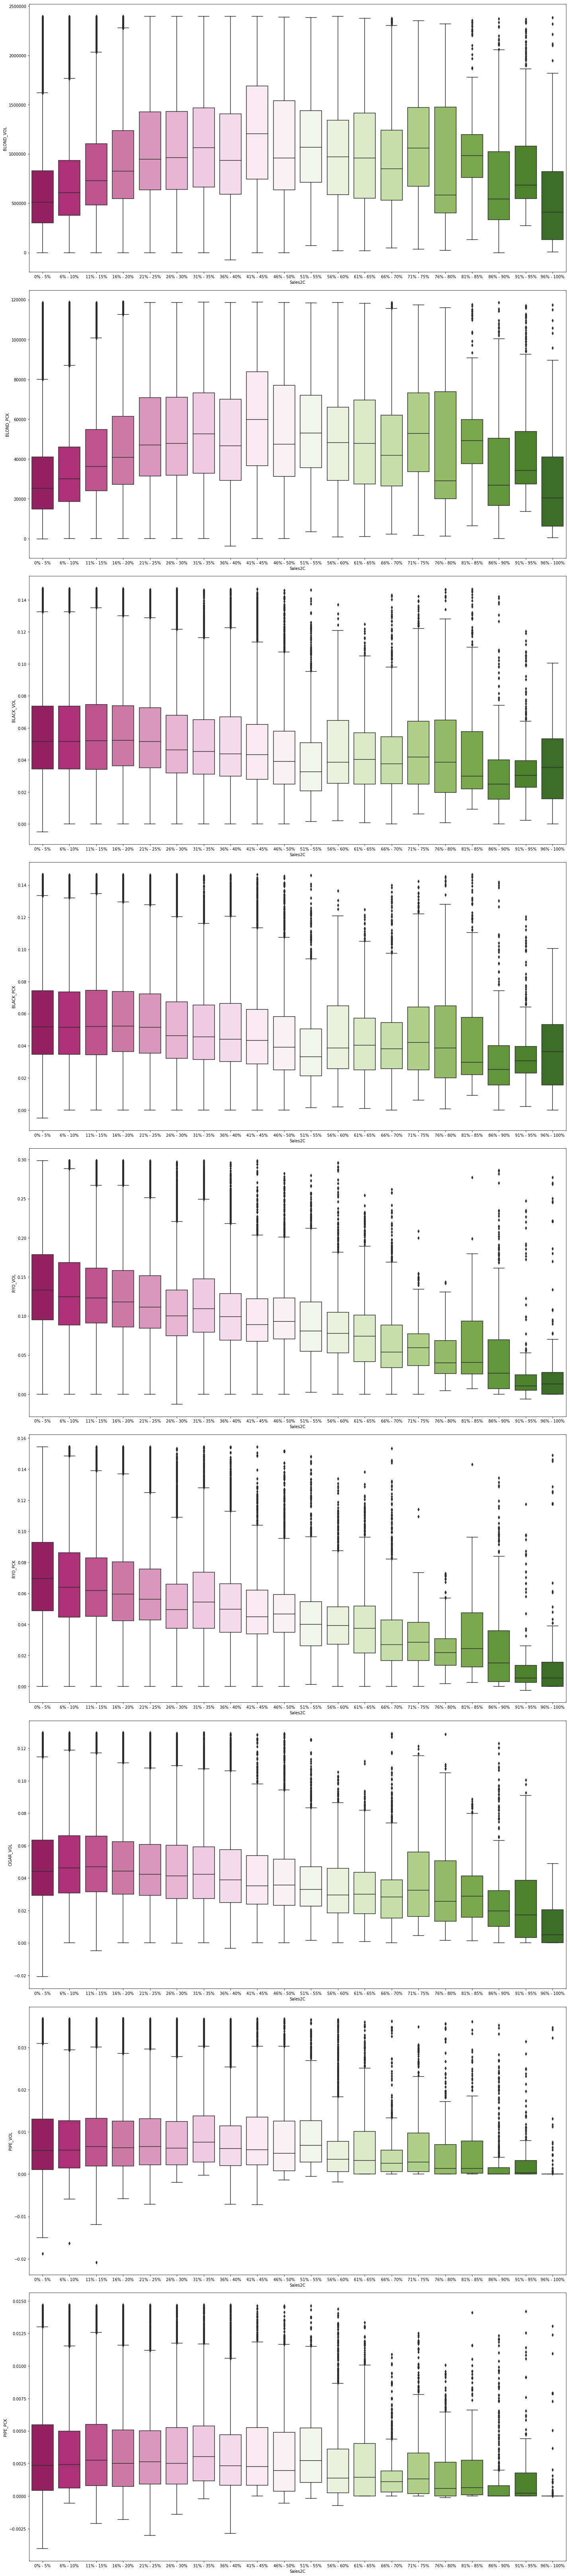

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
#Importo seaborn para gráficos
import seaborn as sns


plt.figure(figsize=(20,90))
for i, feature in enumerate(feats_to_explore):
    plt.subplot(9, 1, i+1)
    sns.boxplot(x='Sales2C', y=feature, data=train_cleaned, palette= "PiYG", 
                order=labels)

plt.tight_layout()
plt.show()

In [33]:
Corr_feats = ['Sales2C_num']
Corr_feats.extend(feats_to_explore)
train_cleaned[Corr_feats].corr()

,Sales2C_num,BLOND_VOL,BLOND_PCK,BLACK_VOL,BLACK_PCK,RYO_VOL,RYO_PCK,CIGAR_VOL,PIPE_VOL,PIPE_PCK
Sales2C_num,1.000000,0.383862,0.385073,-0.141827,-0.142805,-0.109973,-0.129606,-0.119712,0.079510,0.067723
BLOND_VOL,0.383862,1.000000,0.999822,-0.181436,-0.183792,0.090581,0.057999,-0.139402,0.244154,0.229684
BLOND_PCK,0.385073,0.999822,1.000000,-0.177513,-0.180033,0.089007,0.056777,-0.137470,0.241583,0.226943
BLACK_VOL,-0.141827,-0.181436,-0.177513,1.000000,0.999676,0.030270,0.064329,0.374016,-0.155457,-0.131540
BLACK_PCK,-0.142805,-0.183792,-0.180033,0.999676,1.000000,0.029345,0.062974,0.373549,-0.156085,-0.132300
RYO_VOL,-0.109973,0.090581,0.089007,0.030270,0.029345,1.000000,0.970391,0.243440,0.327725,0.360446
RYO_PCK,-0.129606,0.057999,0.056777,0.064329,0.062974,0.970391,1.000000,0.208762,0.283997,0.320677
CIGAR_VOL,-0.119712,-0.139402,-0.137470,0.374016,0.373549,0.243440,0.208762,1.000000,0.082220,0.105473
PIPE_VOL,0.079510,0.244154,0.241583,-0.155457,-0.156085,0.327725,0.283997,0.082220,1.000000,0.922250
PIPE_PCK,0.067723,0.229684,0.226943,-0.131540,-0.132300,0.360446,0.320677,0.105473,0.922250,1.000000


In [34]:
Corr_feats = ['Sales2C_num',  'BLOND_PCK',  'BLACK_PCK', 'RYO_PCK', 'CIGAR_VOL', 'PIPE_VOL'] 

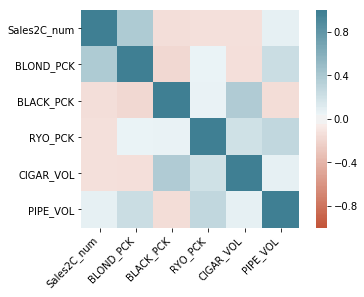

In [35]:
corr = train_cleaned[Corr_feats].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [36]:
train_cleaned[Corr_feats].corr()

,Sales2C_num,BLOND_PCK,BLACK_PCK,RYO_PCK,CIGAR_VOL,PIPE_VOL
Sales2C_num,1.000000,0.385073,-0.142805,-0.129606,-0.119712,0.079510
BLOND_PCK,0.385073,1.000000,-0.180033,0.056777,-0.137470,0.241583
BLACK_PCK,-0.142805,-0.180033,1.000000,0.062974,0.373549,-0.156085
RYO_PCK,-0.129606,0.056777,0.062974,1.000000,0.208762,0.283997
CIGAR_VOL,-0.119712,-0.137470,0.373549,0.208762,1.000000,0.082220
PIPE_VOL,0.079510,0.241583,-0.156085,0.283997,0.082220,1.000000


In [37]:
train_cleaned.columns

Index(['CUSTOMER_ID', 'Sales2C', 'Sales2C_num', 'tikets', 'MES', 'BLACK_VOL',
       'BLACK_PCK', 'RYO_VOL', 'RYO_PCK', 'CIGAR_VOL', 'PIPE_VOL', 'PIPE_PCK',
       'BLOND_VOL', 'BLOND_PCK'],
      dtype='object')

In [17]:
Corr_feats = [ 'BLOND_PCK',  'BLACK_PCK', 'RYO_PCK', 'CIGAR_VOL', 'PIPE_VOL'] 

In [39]:
train_cleaned.shape

(926718, 14)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
Score = lab_enc.fit_transform( train_cleaned['Sales2C_num'])

X_train, X_test, y_train, y_test = train_test_split(train_cleaned[feats_to_explore], Score, test_size=0.2, random_state=2017, stratify=train_cleaned['Sales2C_num'])

In [54]:
def proporcion_etiquetas(y):
    _, count = np.unique(y, return_counts=True)
    return np.true_divide(count, y.shape[0])
    

print("Número de imágenes para entrenar: {}".format(X_train.shape[0]))
print("Número de imágenes para test: {}".format(X_test.shape[0]))

print("Proporción de las etiquetas en el conjunto original: {}".format(proporcion_etiquetas(Score)))
print("Proporción de las etiquetas en el conjunto de entrenamiento: {}".format(proporcion_etiquetas(y_train)))
print("Proporción de las etiquetas en el conjunto de test: {}".format(proporcion_etiquetas(y_test)))

Número de imágenes para entrenar: 741374
Número de imágenes para test: 185344
Proporción de las etiquetas en el conjunto original: [0.18675908 0.15836857 0.136541   0.12238351 0.11966855 0.06973103
 0.05254565 0.03626993 0.04067688 0.01768715 0.0146312  0.00911928
 0.00942034 0.00744024 0.00573421 0.00347571 0.00322104 0.00214089
 0.00237289 0.0010575  0.00075535]
Proporción de las etiquetas en el conjunto de entrenamiento: [0.18675864 0.15836811 0.13654107 0.12238357 0.11966835 0.06973134
 0.05254568 0.03627049 0.04067718 0.01768743 0.01463094 0.00911955
 0.00942035 0.00744024 0.00573395 0.00347598 0.00322105 0.00214062
 0.00237262 0.0010575  0.00075535]
Proporción de las etiquetas en el conjunto de test: [0.18676083 0.15837038 0.1365407  0.12238324 0.11966937 0.0697298
 0.05254554 0.0362677  0.04067572 0.01768603 0.01463225 0.00911818
 0.00942032 0.00744022 0.00573528 0.00347462 0.00322104 0.00214196
 0.00237396 0.00105749 0.00075535]


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

%%time

knc = KNeighborsClassifier()
GP= {"n_neighbors": [3,4,5,6], 
     "weights": ["uniform", "distance"],
     "metric":["euclidean","manhattan"]}
GS= GridSearchCV(knc, param_grid=GP, cv=4)
GS_results=GS.fit(X_train, y_train)

In [56]:
print("Mejor Resultado:", GS_results.best_score_)
print("Párametros Mejor Resultado:", GS_results.best_params_)
#print(GS_results.best_estimator_)

Mejor Resultado: 0.8478783987569027
Párametros Mejor Resultado: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [59]:
GS_results.cv_results_['rank_test_score']

array([39, 39,  4, 36,  2, 33,  6, 32, 15, 30, 14, 28, 11, 26, 12, 24, 16,
       21, 18, 22, 37, 37,  3, 35,  1, 34,  7, 31, 10, 29, 13, 27,  9, 25,
        5, 23,  8, 20, 17, 19])

In [60]:
 GS_results.cv_results_["mean_test_score"]

array([0.84115575, 0.84115575, 0.84772193, 0.8412677 , 0.8478757 ,
       0.84308999, 0.8475223 , 0.84402879, 0.84725928, 0.84474907,
       0.84728895, 0.84517936, 0.84733886, 0.84539787, 0.84733212,
       0.8454842 , 0.84716351, 0.84560694, 0.84686676, 0.84557322,
       0.84123803, 0.84123803, 0.84781365, 0.84135403, 0.8478784 ,
       0.8430212 , 0.84751826, 0.84409488, 0.84736449, 0.84487721,
       0.84729705, 0.84529401, 0.84736584, 0.84540192, 0.84752365,
       0.84553815, 0.8474063 , 0.84563527, 0.84705965, 0.84566629])

In [61]:
GS_results.cv_results_["std_test_score"]

array([0.00135633, 0.00135633, 0.0014021 , 0.00137405, 0.00135261,
       0.00137634, 0.0012439 , 0.0012788 , 0.00127671, 0.0011888 ,
       0.00124744, 0.00117839, 0.0012653 , 0.00119136, 0.0013401 ,
       0.00131353, 0.00123248, 0.00128737, 0.00111408, 0.00123804,
       0.00139035, 0.00139035, 0.00150993, 0.00140043, 0.00152376,
       0.00147343, 0.00129349, 0.0013391 , 0.00128878, 0.00124058,
       0.00125436, 0.00119441, 0.00124217, 0.0012287 , 0.00115192,
       0.00116097, 0.00107924, 0.00121519, 0.00106183, 0.00127791])